### 1. DataFrame - 컬럼명 변경 및 추가

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [13]:
data1 = {
        'name':['James','Peter','Robert','Tom'],
        'address':['NY','NY','LA','Texas'],
        'age':[33,44,55,66]    
}

df1 = DataFrame(data1)
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [8]:
df2 = DataFrame(np.random.randint(10,100,16).reshape(4,4),
                index = list('ABCD'), 
                columns = list('ABCD'))
df2.columns  = ['one','two','three','four']
df2

,one,two,three,four
A,76,25,68,97
B,14,91,71,15
C,77,38,80,31
D,98,68,11,50


In [9]:
# 1. 컬럼명 변경
'''
1) 전체 컬럼을 수정 - columns ---> inplace = True, 원본이 바뀐다
2) 부분 컬럼을 수정 - rename  ---> inplace = False
'''
df2.columns = ['A-class','B-class','C-class','D-class']
df2

,A-class,B-class,C-class,D-class
A,76,25,68,97
B,14,91,71,15
C,77,38,80,31
D,98,68,11,50


In [15]:
'''
inplace = False
의 의미는 원본이 바귀지 않음을 의미한다.
원본을 바꿀려면 반드시 inplace=True로 지정해서 사용해야 한다...2

혹은 
다른 변수에 새롭게 할당하고
새로운 변수를 출력해야 한다...1
'''
# 1. 
# df1_1 = df1.rename(columns={'address':'addr'})
# df1.rename? # 위에 처럼 했는데 안바뀌는 이유 확인!! inplace=False이기 때문에!!
# df1_1

# 2.
df1.rename(columns={'address':'addr'}, inplace=True)
df1

,name,addr,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


### 2. DataFrame - 조회하기

In [22]:
df2.columns = ['one','two','three','four']
df2

# 1. 행을 검색하는 슬라이싱 방법( 1. 숫자 인덱스  2. 라벨 인덱스)
df2[0:2] # 인덱스...숫자...마지막 숫자는 포함 안함
df2['A':'B'] # 인덱스...라벨...마지막 라벨은 포함

df2['one':'three'] # 슬라이싱...행을 조회하는 방법...행 부분에 저런 라벨이 없기 때문에 검출 안됨.

,one,two,three,four


In [83]:
df2

,one,two,three,four
A,76,25,68,97
B,14,91,71,15
C,77,38,80,31
D,98,68,11,50


In [199]:
#2. 컬럼 조회는 행을 조회하는 방법과는 다른 방법을 사용한다.
# df2['one','three'] # ? --> 1차원 구조에서 사용하는 방법

print(df2[['one','three']]) # 2차원
print(df2[df2['two']>45])
print('*'*30)
# two 컬럼에서 45보다 큰값들만 출력하세요....숙제....loc, iloc, at, iat를 사용
print(df2[df2['two']>45].iloc[:,1])
print('*'*30)
print(df2[df2['two']>45]['two'])
print('*'*30)
d = df2[df2.iloc[:,1:2]>45]
d # 누락 데이터 존재

   one  three
A   76     68
B   14     71
C   77     80
D   98     11
   one  two  three  four
B   14   91     71    15
D   98   68     11    50
******************************
B    91
D    68
Name: two, dtype: int32
******************************
B    91
D    68
Name: two, dtype: int32
******************************


,one,two,three,four
A,NaN,NaN,NaN,NaN
B,NaN,91.0,NaN,NaN
C,NaN,NaN,NaN,NaN
D,NaN,68.0,NaN,NaN


### 3. iloc, loc | lat, at 조회하기
iloc(integer location),loc :스칼라값 가져오는 용도가 아니다.  
iat, at : 스칼라 값(one row one columns) 조회하는 용도

In [42]:
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [51]:
# iloc --- i는 index를 의미한다...그래서 마지막 숫자는 포함 안됨
print(df1.iloc[0:2,0:3])
print('*'*30)
print(df1.iloc[:2,:3])
print('*'*30)
print(df1.iloc[0:2])
print('*'*30)
print(df1.iloc[:2])

    name address  age
0  James      NY   33
1  Peter      NY   44
******************************
    name address  age
0  James      NY   33
1  Peter      NY   44
******************************
    name address  age
0  James      NY   33
1  Peter      NY   44
******************************
    name address  age
0  James      NY   33
1  Peter      NY   44


In [71]:
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [75]:
# loc를 살펴보자...
print(df1.loc[0:1]) # 라벨을 의미하기 때문에 마지막 숫자, 혹은 문자를 포함한다.
print(df1.loc[0:1,'name':'address'])

    name address  age
0  James      NY   33
1  Peter      NY   44
    name address
0  James      NY
1  Peter      NY


In [77]:
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [81]:
# 스칼라값 가져오기....iat, at
# Robert의 나이 55를 검색
print(df1.at[2,'age'])

# Tom의 주소를 검색...Texas...at
print(df1.at[3,'address'])

# iat...Peter의 주소...NY를 검색
print(df1.iat[1,1])

# iat...Robert의 나이...55를 검색
print(df1.iat[2,2])

55
Texas
NY
55


### 4. 누락 데이터 삭제하기 - drop()
- drop() : 데이터 삭제
- dropna() : 누락 데이터(NaN) 삭제

In [143]:
# phone 컬럼 추가
df1['phone'] = np.nan
df1

df1.loc[4] = np.nan
df1

,name,address,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Robert,LA,55.0,NaN
3,Tom,Texas,66.0,NaN
4,NaN,NaN,NaN,NaN


In [144]:
# 데이터 삭제하기...drop() 함수
df1.drop(4) # 4행 라벨...삭제

,name,address,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Robert,LA,55.0,NaN
3,Tom,Texas,66.0,NaN


In [145]:
df1 # 원본 삭제 안된다...inplace옵션 줘야 한다.

,name,address,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Robert,LA,55.0,NaN
3,Tom,Texas,66.0,NaN
4,NaN,NaN,NaN,NaN


In [146]:
# drop 함수를 이용해서 phone 컬럼 삭제...inplace = True..원본 삭제
df1.drop('phone', axis = 1, inplace = True)

In [147]:
df1

,name,address,age
0,James,NY,33.0
1,Peter,NY,44.0
2,Robert,LA,55.0
3,Tom,Texas,66.0
4,NaN,NaN,NaN


In [148]:
# 4행 원본에서 삭제
df1.drop(4, inplace = True)

In [149]:
df1

,name,address,age
0,James,NY,33.0
1,Peter,NY,44.0
2,Robert,LA,55.0
3,Tom,Texas,66.0


### 5. 누락 데이터 삭제하기 - dropna()

Pandas에서는 누락 데이터를 모두 NaN으로 처리한다.  
통계 함수는 누락 데이터를 배제하고 연산된다.  
- dropna() - nan 값이 하나라도 있는 모든 행을 삭제
- dropna(how='all') - 모든 값이 NaN인 행만 삭제
- dropna(how='any') - 하나라도 NaN이라면 그 행을 삭제...default
- dropna(thresh=3) - NaN이 2개...있으면 삭제한다. thresh : 임계치,한계치
-------------------------------------------------------------------------
- fillna() - NaN 데이터를 다른 값으로 채우는 함수
-------------------------------------------------------------------------
- isnull()
- notnull()

In [152]:
from numpy import nan as NA
df = DataFrame([[1, 6.5, 3],[1, NA, NA],[NA, NA, NA],[NA, 6.5, 3]])
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [153]:
removeNa = df.dropna() # how = any
removeNa

,0,1,2
0,1.0,6.5,3.0


In [155]:
df.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [156]:
df.dropna(thresh=2)

,0,1,2
0,1.0,6.5,3.0
3,NaN,6.5,3.0


##### 누락 데이터 채우기

In [159]:
df.fillna(0) # 0으로 채운다.

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [161]:
df.fillna(df.mean()) # 평균값으로 채운다.

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


In [164]:
df.fillna(value = 5)

,0,1,2
0,1.0,6.5,3.0
1,1.0,5.0,5.0
2,5.0,5.0,5.0
3,5.0,6.5,3.0


In [166]:
df.fillna(method='ffill') 

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


### 6. DataFrame - 정렬하기 
- sort_index()
- sort_values()

In [168]:
df2

,one,two,three,four
A,76,25,68,97
B,14,91,71,15
C,77,38,80,31
D,98,68,11,50


In [173]:
# shift + tab : ? documentation 단축키
df2.sort_index()  # ascending=True 가 default

,one,two,three,four
A,76,25,68,97
B,14,91,71,15
C,77,38,80,31
D,98,68,11,50


In [180]:
# 해당 dataFrame의 컬럼은 알파벳이므로 알파벳 기준으로 내림차순
df2.sort_index(axis = 1, ascending=False)

,two,three,one,four
A,25,68,76,97
B,91,71,14,15
C,38,80,77,31
D,68,11,98,50


In [179]:
df2.sort_values(by=['four']) # 기준 점을 잡고 값으로 정렬

,one,two,three,four
B,14,91,71,15
C,77,38,80,31
D,98,68,11,50
A,76,25,68,97


### 실전데이터 응용하기

In [182]:
df3 = pd.read_csv('../data/tips.csv')
df3.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


In [183]:
# 문제 1. tip 이라는 컬럼으로 정렬...내림차순 정렬...샘플데이터 5개만 보이기
df3.sort_values(by=['tip'], ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


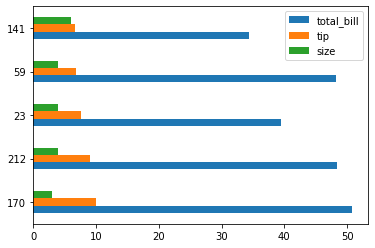

In [185]:
# 위의 정렬된 결과를 시각화 해서 ... 
# df3.sort_values(by=['tip'], ascending=False).head(5).plot(kind='bar')
df3.sort_values(by=['tip'], ascending=False).head(5).plot(kind='barh') # horizontal
plt.show()

     total_bill   tip     sex smoker  day    time  size
94        22.75  3.25  Female     No  Fri  Dinner   2.0
221       13.42  3.48  Female    Yes  Fri   Lunch   2.0
91        22.49  3.50    Male     No  Fri  Dinner   2.0
96        27.28  4.00    Male    Yes  Fri  Dinner   2.0
93        16.32  4.30  Female    Yes  Fri  Dinner   2.0
95        40.17  4.73    Male    Yes  Fri  Dinner   4.0
244       25.34   NaN     NaN    NaN  NaN     NaN   NaN


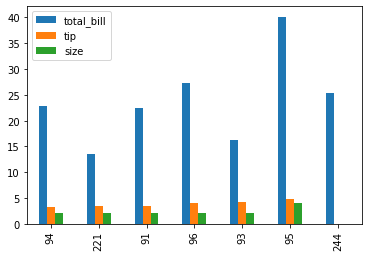

In [190]:
# 문제 2. day, tip 컬럼을 차례로 정렬
# day는 내림차순 정렬, tip은 오름차순
# 마지막 데이터 7줄만 보이기
df = df3.sort_values(by=['day','tip'], ascending=[False, True]).tail(7)
print(df)

df.plot(kind='bar')
plt.show()

In [193]:
# 문제 3.....DISTINCT....unique()
df3['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri', nan], dtype=object)

In [195]:
df3['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64